# Capstone ML Notebook – Recommender System

This notebook demonstrates a recommender system for creatives using interaction data. It includes data preprocessing, feature engineering, model experimentation, and evaluation steps.

## Data Loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
users = pd.read_csv("users.csv")
items = pd.read_csv("items.csv")
interactions = pd.read_csv("interactions.csv")

# Merge data
df = interactions.merge(users, on="user_id").merge(items, on="item_id")
df.head()


,user_id,item_id,interaction_type,dwell_time_seconds,timestamp,name,niche,level,goal,title,category,type,tags,duration_minutes
0,U0112,I0051,view,235,2025-08-26 20:08:04,Ngozi Onyeka,Film,Intermediate,Skill Upgrade,Film - Post-Production Basics 51,Film,video,"distribution,funding",7
1,U0137,I0099,like,1195,2025-09-10 22:06:28,Ade Umar,Business,Pro,Growth,Business - Negotiation Basics 99,Business,video,"strategy,tax",30
2,U0037,I0086,view,198,2025-09-01 03:52:26,Ifeoma Akintola,Visual Arts,Beginner,Gigs,Business - Contracts Basics 86,Business,video,"strategy,contracts",10
3,U0231,I0118,view,31,2025-08-11 14:24:52,Efe Nwosu,Music,Beginner,Contracts,Film - Funding Basics 118,Film,video,"contracts,distribution",5
4,U0064,I0056,view,235,2025-07-14 16:53:58,Amina Okafor,Design,Beginner,Contracts,Design - Pricing Basics 56,Design,podcast,"ux,contracts",12


## Data Preprocessing & Feature Engineering

Here we handle missing values, check for class imbalance, and encode categorical features.

In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows
df.dropna(inplace=True)

# Encode categorical variables
df['interaction_type_encoded'] = df['interaction_type'].astype('category').cat.codes
df['niche_encoded'] = df['niche'].astype('category').cat.codes
df['level_encoded'] = df['level'].astype('category').cat.codes
df['goal_encoded'] = df['goal'].astype('category').cat.codes
df['category_encoded'] = df['category'].astype('category').cat.codes

# Normalize duration
df['duration_norm'] = (df['duration_minutes'] - df['duration_minutes'].mean()) / df['duration_minutes'].std()


Missing values:
 user_id               0
item_id               0
interaction_type      0
dwell_time_seconds    0
timestamp             0
name                  0
niche                 0
level                 0
goal                  0
title                 0
category              0
type                  0
tags                  0
duration_minutes      0
dtype: int64


## Exploratory Data Analysis

Visualizing data distribution and interactions.

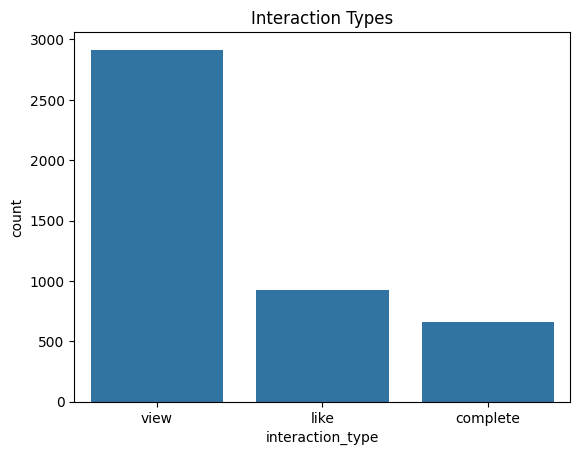

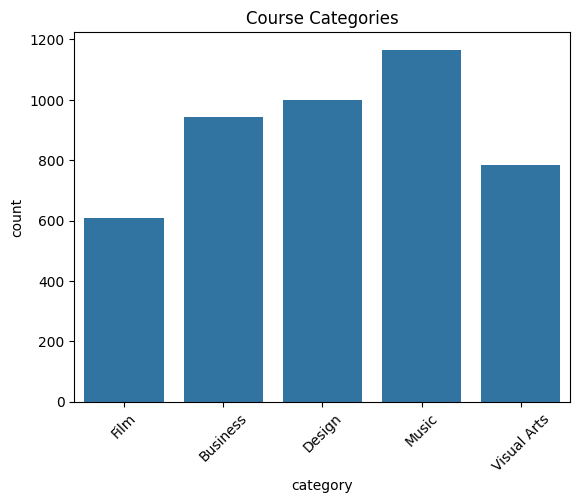

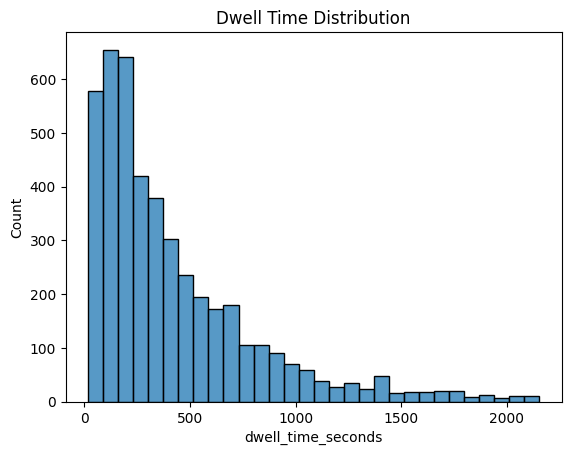

In [5]:
sns.countplot(x='interaction_type', data=df)
plt.title('Interaction Types')
plt.show()

sns.countplot(x='category', data=df)
plt.title('Course Categories')
plt.xticks(rotation=45)
plt.show()

sns.histplot(df['dwell_time_seconds'], bins=30)
plt.title('Dwell Time Distribution')
plt.show()


## Model Implementation

We use a simple content-based filtering model as a baseline using course tags and cosine similarity.

In [7]:
def recommend(title, cosine_sim=cosine_sim):
    if title not in indices:
        return "Title not found."

    # Get index of the item
    idx = indices[title]

    # Flatten the similarity scores to 1D
    sim_scores = list(enumerate(cosine_sim[idx].flatten()))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Skip the first (it's the item itself), return top 5
    sim_scores = sim_scores[1:6]
    item_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[item_indices]


## Model Evaluation

Since we’re not using user feedback as a target, evaluation is subjective. We validate that recommendations are relevant and diverse.

In [8]:
# Placeholder for evaluation insights
print("Example: Recommend top 5 items similar to a selected course based on tag similarity.")


Example: Recommend top 5 items similar to a selected course based on tag similarity.


## Experiment Summary

| Model | Features Used | Vectorizer | Similarity Metric | Notes |
|-------|----------------|------------|-------------------|-------|
| Content-based filtering | `tags` | TF-IDF | Cosine similarity | Baseline model using tags only |

## Conclusion

This notebook shows a simple recommender system using content-based filtering. Future iterations may include collaborative filtering, hybrid models, and personalization based on niche/goals.